<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,24.147110,71.556510,29.083630,63.555566,0.196185,198.539002,198.826324,-0.287322
1,0.0,1.0,69.228982,58.986927,55.228707,70.212902,-0.243008,263.414510,263.851443,-0.436933
2,0.0,2.0,46.819528,28.812184,22.672075,68.983019,-1.240823,176.045983,177.122394,-1.076411
3,0.0,3.0,59.593408,92.957227,27.899481,52.690810,1.332922,244.473849,243.815055,0.658794
4,0.0,4.0,82.289449,30.498939,89.249128,21.368941,0.078514,233.484971,233.350649,0.134322
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,73.818243,84.865819,38.267656,93.744844,0.151762,300.848324,301.218582,-0.370258
29996,999.0,26.0,96.696669,62.810815,90.819581,48.930999,1.379548,310.637613,309.075780,1.561833
29997,999.0,27.0,25.340714,75.969477,59.437965,48.910916,0.248536,219.907608,219.396021,0.511586
29998,999.0,28.0,37.762743,48.983394,30.951406,74.149646,1.205337,203.052526,202.328361,0.724165


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    24.147110  71.556510  29.083630  63.555566  0.196185  198.539002   
      1.0    69.228982  58.986927  55.228707  70.212902 -0.243008  263.414510   
      2.0    46.819528  28.812184  22.672075  68.983019 -1.240823  176.045983   
      3.0    59.593408  92.957227  27.899481  52.690810  1.332922  244.473849   
      4.0    82.289449  30.498939  89.249128  21.368941  0.078514  233.484971   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   73.818243  84.865819  38.267656  93.744844  0.151762  300.848324   
      26.0   96.696669  62.810815  90.819581  48.930999  1.379548  310.637613   
      27.0   25.340714  75.969477  59.437965  48.910916  0.248536  219.907608   
      28.0   37.762743  48.983394  30.951406  74.149646  1.205337  203.052526   
      29.0   60.205810  91.675290  49.489980  52.032145  0.200654  263.603880   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.826324 -0.287322  
      1.0    263.851443 -0.436933  
      2.0    177.122394 -1.076411  
      3.0    243.815055  0.658794  
      4.0    233.350649  0.134322  
...                 ...       ...  
999.0 25.0   301.218582 -0.370258  
      26.0   309.075780  1.561833  
      27.0   219.396021  0.511586  
      28.0   202.328361  0.724165  
      29.0   263.145961  0.457920  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    24.147110  71.556510  29.083630  63.555566  0.196185  198.539002   
      1.0    69.228982  58.986927  55.228707  70.212902 -0.243008  263.414510   
      2.0    46.819528  28.812184  22.672075  68.983019 -1.240823  176.045983   
      3.0    59.593408  92.957227  27.899481  52.690810  1.332922  244.473849   
      4.0    82.289449  30.498939  89.249128  21.368941  0.078514  233.484971   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   73.818243  84.865819  38.267656  93.744844  0.151762  300.848324   
      26.0   96.696669  62.810815  90.819581  48.930999  1.379548  310.637613   
      27.0   25.340714  75.969477  59.437965  48.910916  0.248536  219.907608   
      28.0   37.762743  48.983394  30.951406  74.149646  1.205337  203.052526   
      29.0   60.205810  91.675290  49.489980  52.032145  0.200654  263.603880   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.826324 -0.287322  
      1.0    263.851443 -0.436933  
      2.0    177.122394 -1.076411  
      3.0    243.815055  0.658794  
      4.0    233.350649  0.134322  
...                 ...       ...  
999.0 25.0   301.218582 -0.370258  
      26.0   309.075780  1.561833  
      27.0   219.396021  0.511586  
      28.0   202.328361  0.724165  
      29.0   263.145961  0.457920  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,24.147110,71.556510,29.083630,63.555566,0.196185,198.539002,198.826324,-0.287322
1,0.0,1.0,69.228982,58.986927,55.228707,70.212902,-0.243008,263.414510,263.851443,-0.436933
2,0.0,2.0,46.819528,28.812184,22.672075,68.983019,-1.240823,176.045983,177.122394,-1.076411
3,0.0,3.0,59.593408,92.957227,27.899481,52.690810,1.332922,244.473849,243.815055,0.658794
4,0.0,4.0,82.289449,30.498939,89.249128,21.368941,0.078514,233.484971,233.350649,0.134322
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,73.818243,84.865819,38.267656,93.744844,0.151762,300.848324,301.218582,-0.370258
29996,999.0,26.0,96.696669,62.810815,90.819581,48.930999,1.379548,310.637613,309.075780,1.561833
29997,999.0,27.0,25.340714,75.969477,59.437965,48.910916,0.248536,219.907608,219.396021,0.511586
29998,999.0,28.0,37.762743,48.983394,30.951406,74.149646,1.205337,203.052526,202.328361,0.724165


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    24.147110  71.556510  29.083630  63.555566  0.196185  198.539002   
      1.0    69.228982  58.986927  55.228707  70.212902 -0.243008  263.414510   
      2.0    46.819528  28.812184  22.672075  68.983019 -1.240823  176.045983   
      3.0    59.593408  92.957227  27.899481  52.690810  1.332922  244.473849   
      4.0    82.289449  30.498939  89.249128  21.368941  0.078514  233.484971   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   73.818243  84.865819  38.267656  93.744844  0.151762  300.848324   
      26.0   96.696669  62.810815  90.819581  48.930999  1.379548  310.637613   
      27.0   25.340714  75.969477  59.437965  48.910916  0.248536  219.907608   
      28.0   37.762743  48.983394  30.951406  74.149646  1.205337  203.052526   
      29.0   60.205810  91.675290  49.489980  52.032145  0.200654  263.603880   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.826324 -0.287322  
      1.0    263.851443 -0.436933  
      2.0    177.122394 -1.076411  
      3.0    243.815055  0.658794  
      4.0    233.350649  0.134322  
...                 ...       ...  
999.0 25.0   301.218582 -0.370258  
      26.0   309.075780  1.561833  
      27.0   219.396021  0.511586  
      28.0   202.328361  0.724165  
      29.0   263.145961  0.457920  

[30000 rows x 8 columns]

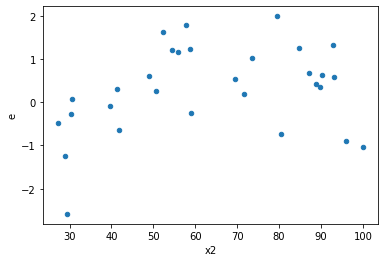

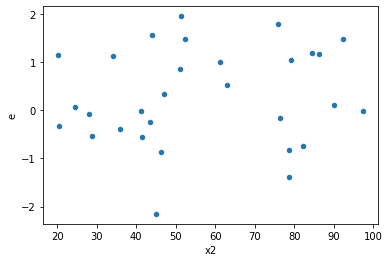

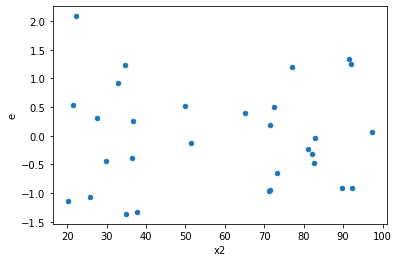

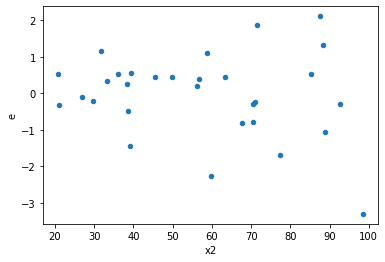

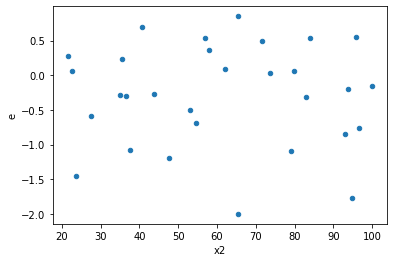

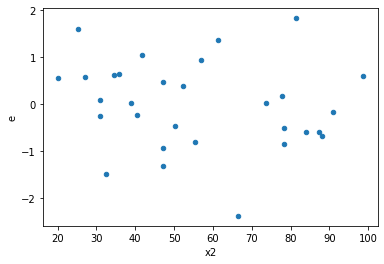

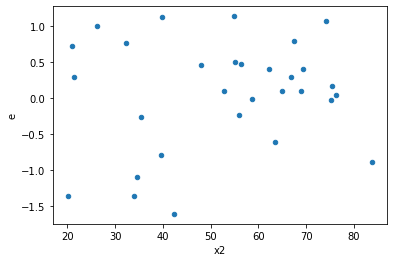

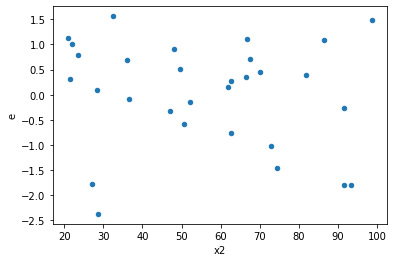

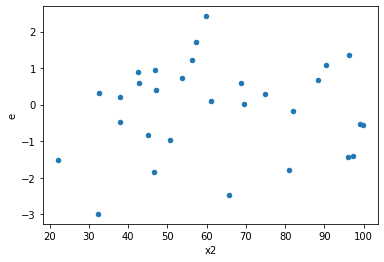

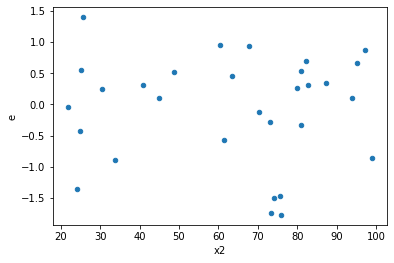

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,16.0,4.19025775896744,14.145722185646825,0.69837629316124,0.8841076366029266,1.265947377166775,0.6531273755863016,0.6734363122068492,0.3265636877931508,Reject001=1 : Homoscedasticity
4.0,13.0,9.0,6.977063137822619,6.3786652022055765,0.5366971644478938,0.7087405780228418,1.3205595724582053,0.68829638500406,0.65585180749797,0.34414819250203,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,11.137003323055245,8.547073747566293,0.8566925633119419,0.9496748608406992,1.1085363659155523,0.8996986302674845,0.5501506848662577,0.44984931513374227,Reject001=1 : Homoscedasticity
7.0,16.0,6.0,12.342516238340695,11.556159186106079,0.7714072648962934,1.9260265310176798,2.4967700184630894,0.26420338252904796,0.867898308735476,0.13210169126452398,Reject001=1 : Homoscedasticity
9.0,16.0,6.0,10.304193746269982,5.816701534997222,0.6440121091418739,0.9694502558328703,1.5053292353844596,0.6409785680031104,0.6795107159984448,0.3204892840015552,Reject001=1 : Homoscedasticity
11.0,7.0,15.0,2.282528022207535,13.415901326289998,0.32607543174393355,0.8943934217526665,2.742903434856239,0.09566445768447962,0.9521677711577602,0.04783222884223981,Reject001=1 : Homoscedasticity
13.0,10.0,12.0,5.022124272430592,11.8470823738018,0.5022124272430591,0.9872568644834834,1.965815282395778,0.2667245729634915,0.8666377135182542,0.13336228648174575,Reject001=1 : Homoscedasticity
15.0,14.0,8.0,6.243776464867223,4.735886634375372,0.4459840332048017,0.5919858292969215,1.32737000704479,0.7058098791871941,0.647095060406403,0.35290493959359703,Reject001=1 : Homoscedasticity
17.0,14.0,8.0,8.499788069282502,10.765971690543061,0.6071277192344644,1.3457464613178827,2.21657884936427,0.2595439947905118,0.8702280026047441,0.1297719973952559,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,16.0,4.19025775896744,14.145722185646825,0.69837629316124,0.8841076366029266,1.265947377166775,0.6531273755863016,Reject001=1 : Homoscedasticity
1.0,10.0,12.0,10.882748599426716,7.150001635079338,1.0882748599426715,0.5958334695899449,0.5475027417442432,0.3480398470784227,Reject001=1 : Homoscedasticity
2.0,17.0,5.0,13.85793362048641,2.337597379352262,0.8151725659109653,0.46751947587045245,0.573522092647946,0.3572070003747474,Reject001=1 : Homoscedasticity
3.0,12.0,10.0,26.96942669337127,5.1730166361804635,2.247452224447606,0.5173016636180463,0.23017248508817234,0.01912326842494832,Reject001=1 : Homoscedasticity
4.0,13.0,9.0,6.977063137822619,6.3786652022055765,0.5366971644478938,0.7087405780228418,1.3205595724582053,0.68829638500406,Reject001=1 : Homoscedasticity
5.0,13.0,9.0,11.137003323055245,8.547073747566293,0.8566925633119419,0.9496748608406992,1.1085363659155523,0.8996986302674845,Reject001=1 : Homoscedasticity
6.0,14.0,8.0,9.837194285655753,2.7510058804681843,0.7026567346896967,0.34387573505852304,0.489393637151124,0.23148327523215279,Reject001=1 : Homoscedasticity
7.0,16.0,6.0,12.342516238340695,11.556159186106079,0.7714072648962934,1.9260265310176798,2.4967700184630894,0.26420338252904796,Reject001=1 : Homoscedasticity
8.0,16.0,6.0,24.601786405891502,3.4703690845937634,1.537611650368219,0.5783948474322939,0.37616445433005335,0.1104692148330911,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64